# Import Dataset

Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

The dataset includes academic, demographic, and socio-economic factors such as grades, parental education, scholarships, and more. The target variable indicates whether a student graduated or dropped out.

In [ ]:
df = pd.read_csv("Dropout_Academic Success - Sheet1.csv", sep=",")
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


# Data cleaning, information and visualization

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:
df.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0
Father's qualification,0


In [ ]:
df.shape

(4424, 37)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


Since no values were missing, we proceed directly to encoding categorical variables.

# Categorical Variables

We need to identify which columns are categorical and convert them to numeric format. In this case, only our "Target" variable is categorical.

We will start by encoding the categorical variable using label encoding

In [ ]:
le = LabelEncoder()
df['Target'] = le.fit_transform(df['Target'])
unique_values = {
    'Target': df['Target'].unique(),
}
unique_values

{'Target': array([0, 2, 1])}

In [ ]:
df['Target'].value_counts()

,count
Target,
2,2209
0,1421
1,794


Most students (2209) graduated, which represents the largest group. The second largest group is students who dropped out, with 1421 cases. Finally, the smallest group consists of students still enrolled, with 794 records.

In [ ]:
df['Target'].head()

,Target
0,0
1,2
2,0
3,2
4,2


Categorical coding is complete: the variable "Target" has been coded as 0 (Dropout) and 2 (Graduate).

# Exploratory Data Analysis (EDA)

<ipython-input-42-17b9b9cb54ca>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Target'], color="Blue")


<Axes: xlabel='Target', ylabel='Density'>

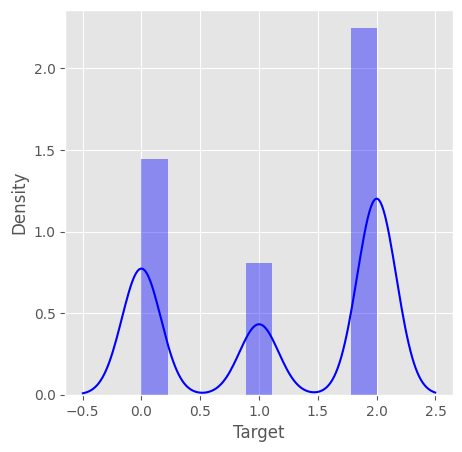

In [ ]:
plt.figure(figsize=(5, 5))
sns.distplot(df['Target'], color="Blue")

The plot shows the distribution of students by academic status. The first bar represents students who dropped out, demonstrating considerable density. The second bar corresponds to currently enrolled students, with a lower density compared to the other classes. Finally, the third bar represents students who graduated, with this class having the highest density within the data set.

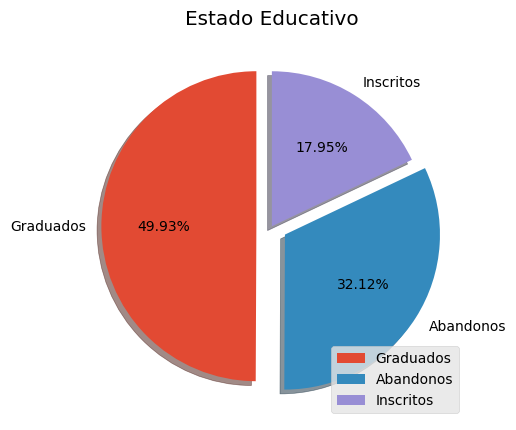

In [ ]:
plt.figure(figsize=(5, 8))
plt.title("Estado Educativo")
plt.pie(df['Target'].value_counts(), labels = ['Graduados', 'Abandonos', 'Inscritos'], explode = (0.1, 0.1, 0.0), autopct = '%1.2f%%', shadow = True, startangle = 90)
plt.legend(loc = 'lower right')
plt.show()

This plot shows the distribution of students' educational status:

* The majority have graduated (49.93%)
* Followed by those who dropped out (32.12%)
* And those still enrolled (17.95%)

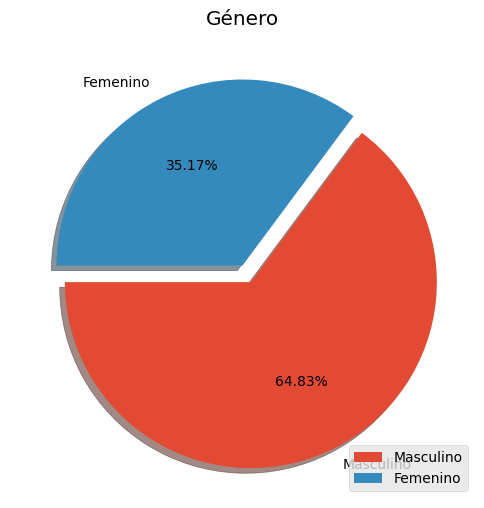

In [ ]:
plt.figure(figsize=(6, 8))
plt.title("Gender")
plt.pie(df['Gender'].value_counts(), labels = ['Masculino', 'Femenino'], explode = (0.1, 0.0), autopct='%1.2f%%', shadow=True, startangle=180)
plt.legend(loc = 'lower right')
plt.show()

The plot shows the gender distribution of students in the data set. It can be seen that 64.83% of the students are male, while 35.17% are female. This indicates a greater representation of males in the analyzed sample.

### **Univariate analysis**
Analyze the distribution of the target group (dropouts vs. graduates)

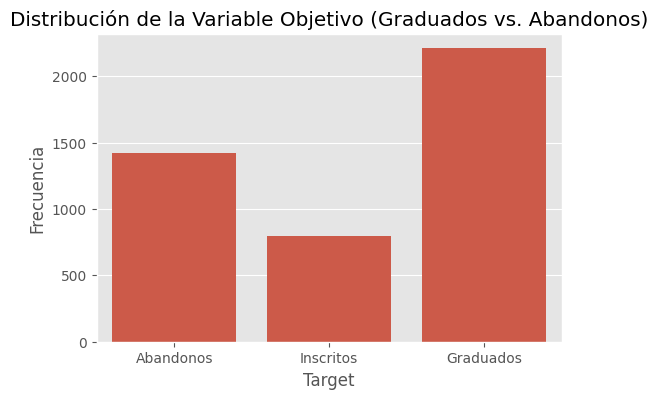

In [ ]:
plt.style.use('ggplot')

plt.figure(figsize=(6, 4))
sns.countplot(x='Target', data=df)
plt.title('Distribución de la Variable Objetivo (Graduados vs. Abandonos)')
plt.xticks([0, 1, 2], ['Abandonos', 'Inscritos', 'Graduados'])
plt.ylabel('Frecuencia')
plt.show()

The plot shows a relatively balanced distribution between students who dropped out and those who graduated, which is good for building models since we don't have a significant class imbalance.

### **Bivariate analysis**
Examine the relationships between individual characteristics (e.g., grade point average, marital status, socioeconomic factors) and the target variable.

In [ ]:
df['Average Grade'] = (df['Curricular units 1st sem (grade)'] + df['Curricular units 2nd sem (grade)']) / 2
df['Grade Improvement Flag'] = (df['Curricular units 2nd sem (grade)'] > df['Curricular units 1st sem (grade)']).astype(int)
new_columns = df[['Average Grade', 'Grade Improvement Flag', 'Target']].head()
new_columns

,Average Grade,Grade Improvement Flag,Target
0,0.000000,0,0
1,13.833333,0,2
2,0.000000,0,0
3,12.914286,0,2
4,12.666667,1,2


Two new variables were incorporated into the analysis of academic performance. The first, called "Average Grade," represents the average of the grades earned by each student in the first and second semesters, providing an overall measure of performance. The second, "Grade Improvement Flag," is a binary indicator that takes the value of 1 if the student improved their grades in the second semester compared to the first, and 0 if there was no improvement. This variable allows for identifying patterns of academic progress over time.

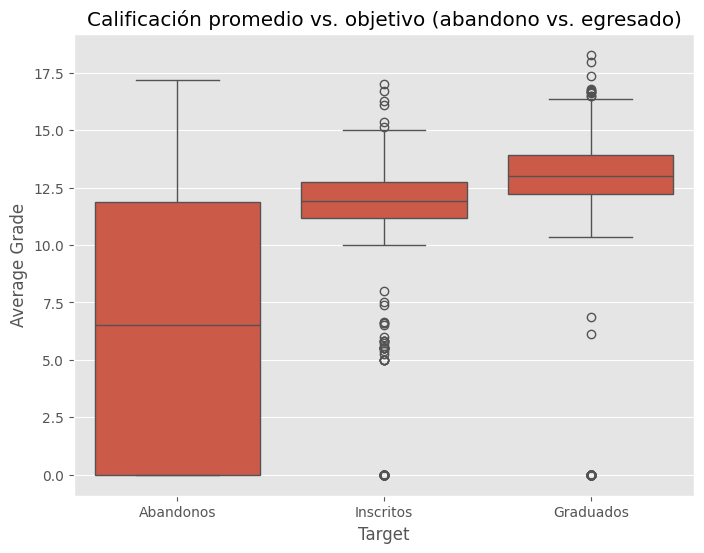

In [ ]:
# Bivariate Analysis: Average Grade vs Target
plt.figure(figsize=(8, 6))
sns.boxplot(x='Target', y='Average Grade', data=df)
plt.title('Calificación promedio vs. objetivo (abandono vs. egresado)')
plt.xticks([0, 1, 2], ['Abandonos', 'Inscritos', 'Graduados'])
plt.show()

Students with higher grade point averages are more likely to graduate, as shown in the box plot. Students with lower grades tend to drop out. This suggests that academic performance, specifically grades, is a strong predictor of dropping out.

### **Correlation Analysis**

Identify which numerical characteristics are strongly correlated with the target variable.

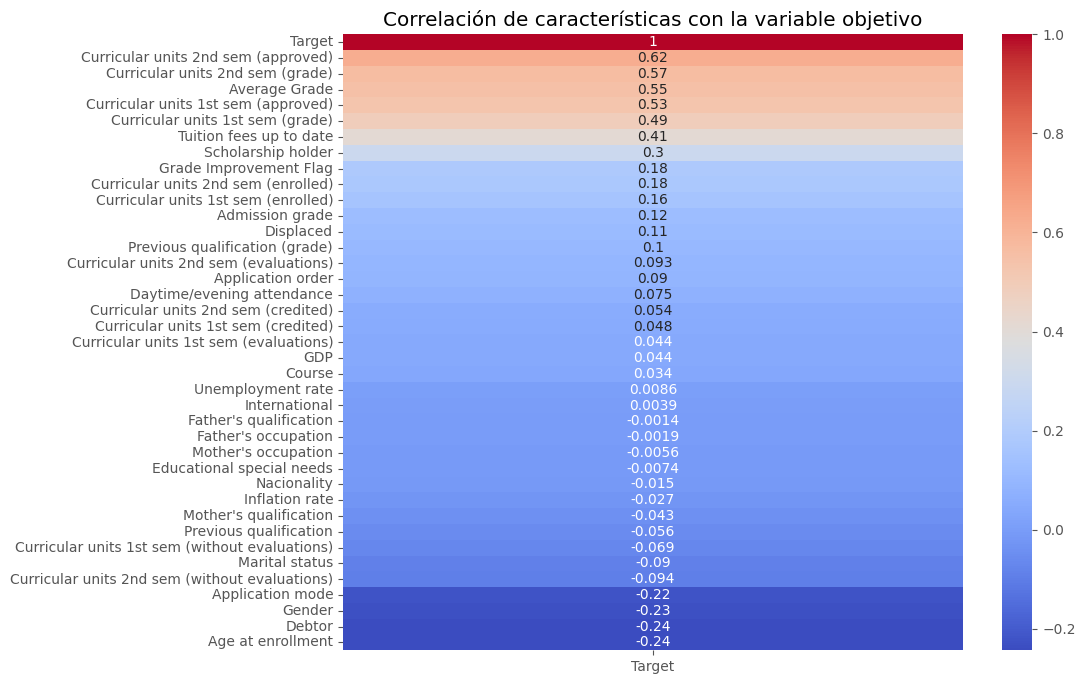

In [ ]:
# Heat map of correlation of numerical features with the target variable
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix[['Target']].sort_values(by='Target', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlación de características con la variable objetivo')
plt.show()

The heat map shows the correlation between each characteristic and the target variable. The average grade point average is negatively correlated with dropout, meaning that higher grades reduce the likelihood of dropping out.


Characteristics such as curricular units completed also show correlations, indicating that academic progress plays an important role in student retention.

Likewise, age at enrollment and debt status are negatively correlated with dropout. This suggests that younger students and those without debt are more likely to complete their studies.

When predicting whether a student will drop out of school, the number of students enrolled is irrelevant. We only need to know whether they graduated or dropped out. Therefore, we eliminate the "Enrolled" values ​​and continue with the "Graduate" and "Dropout" values.

In [ ]:
df.drop(df[df['Target'] == 1].index, inplace=True)
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Average Grade,Grade Improvement Flag
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0.000000,0,10.8,1.4,1.74,0,0.000000,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,13.666667,0,13.9,-0.3,0.79,2,13.833333,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,0.000000,0,10.8,1.4,1.74,0,0.000000,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,10,5,12.400000,0,9.4,-0.8,-3.12,2,12.914286,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,13.000000,0,13.9,-0.3,0.79,2,12.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,8,5,12.666667,0,15.5,2.8,-4.06,2,13.133333,0
4420,1,1,2,9773,1,1,120.0,105,1,1,...,6,2,11.000000,0,11.1,0.6,2.02,0,11.500000,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,9,1,13.500000,0,13.9,-0.3,0.79,0,14.206250,0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,6,5,12.000000,0,9.4,-0.8,-3.12,2,12.900000,0


<ipython-input-55-3c3e222fee9f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Target'], color="Red")


<Axes: xlabel='Target', ylabel='Density'>

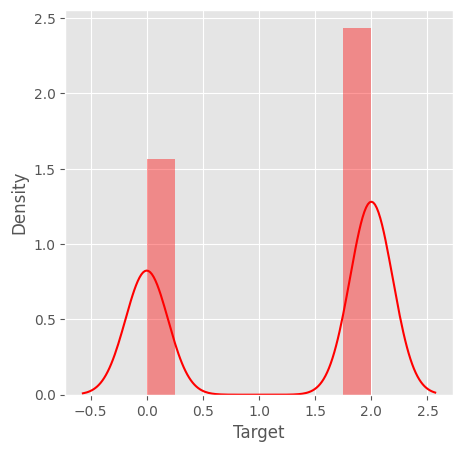

In [ ]:
plt.figure(figsize=(5, 5))
sns.distplot(df['Target'], color="Red")

After drop currently enrolled students, the graph shows the distribution of the target variable, centered solely on two groups: those who dropped out (0) and those who graduated (2). The density is highest in the graduating class, indicating that more students completed their studies than those who dropped out.

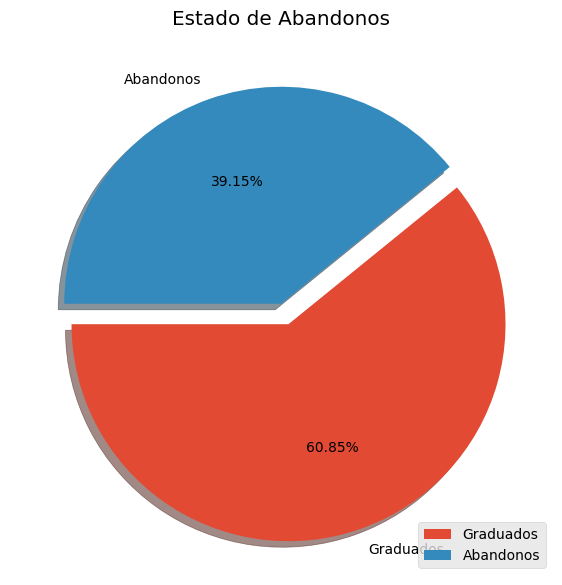

In [ ]:
plt.figure(figsize=(7, 8))
plt.title('Estado de Abandonos')
plt.pie(df['Target'].value_counts(), labels=['Graduados', 'Abandonos'], explode=(0.1, 0.0), autopct='%1.2f%%', shadow=True, startangle=180)
plt.legend(loc='lower right')
plt.show()

The plot shows the proportion of students who dropped out of school compared to those who graduated. Of the total, 60.85% were graduates, while 39.15% were dropouts. This visualization highlights that, although the majority complete their studies, a significant portion of students fail to complete their studies.

### **Standard Data Scaling**

**Re-label with LabelEncoder to ensure classes are [0, 1]**

In [ ]:
# Inicialización de LabelEncoder para la variable "Target"
le = LabelEncoder()

# Codificación de la columna 'Target' (Graduate / Dropout)
df['Target'] = le.fit_transform(df['Target'])

# Verificar los valores únicos de la columna 'Target'
unique_values = {
    'Target': df['Target'].unique(),
}

Reorder columns

In [ ]:
# Separar la columna 'Target' y las demás
target = df['Target']
df = df.drop('Target', axis=1)

# Agregar 'Target' de nuevo al final
df['Target'] = target
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Average Grade,Grade Improvement Flag,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0.000000,0,10.8,1.4,1.74,0.000000,0,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,13.666667,0,13.9,-0.3,0.79,13.833333,0,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,0.000000,0,10.8,1.4,1.74,0.000000,0,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,10,5,12.400000,0,9.4,-0.8,-3.12,12.914286,0,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,13.000000,0,13.9,-0.3,0.79,12.666667,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,8,5,12.666667,0,15.5,2.8,-4.06,13.133333,0,1
4420,1,1,2,9773,1,1,120.0,105,1,1,...,6,2,11.000000,0,11.1,0.6,2.02,11.500000,0,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,9,1,13.500000,0,13.9,-0.3,0.79,14.206250,0,0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,6,5,12.000000,0,9.4,-0.8,-3.12,12.900000,0,1


In [ ]:
# Seleccionar las primeras 37 columnas (sin Target)
columns = df.iloc[:, :37].columns
x = df.iloc[:, :37].values

# Mostrar datos sin escalar
print("Datos originales (sin escalar):\n")
print(x)

# Escalar los  datos
x = StandardScaler().fit_transform(x)

# Mostrar datos ya escalados
print("\nDatos después de aplicar StandardScaler:\n")
print(x[:2])

Datos originales (sin escalar):

[[ 1.   17.    5.   ...  1.4   1.74  0.  ]
 [ 1.   15.    1.   ... -0.3   0.79  2.  ]
 [ 1.    1.    5.   ...  1.4   1.74  0.  ]
 ...
 [ 1.    1.    1.   ... -0.3   0.79  0.  ]
 [ 1.    1.    1.   ... -0.8  -3.12  2.  ]
 [ 1.   10.    1.   ...  3.7  -1.7   2.  ]]

Datos después de aplicar StandardScaler:

[[-3.00685576e-01 -8.19167073e-02  2.43682250e+00 -4.19776915e+00
   3.55850281e-01 -3.52421285e-01 -8.25034230e-01 -1.24214337e-01
  -6.32880452e-02 -6.92161603e-01 -2.20421262e-01 -5.72742311e-02
   4.14846248e-04  9.06297309e-01 -1.05555963e-01 -3.58302217e-01
   3.93166825e-01  1.38069731e+00 -6.03447443e-01 -4.42212114e-01
  -1.55776653e-01 -3.04517416e-01 -2.46553798e+00 -1.88310674e+00
  -1.48003375e+00 -2.08322431e+00 -1.89870965e-01 -2.87685731e-01
  -2.78269116e+00 -1.95858598e+00 -1.42901395e+00 -1.83108537e+00
  -1.90148408e-01 -3.11312179e-01  1.21614589e-01  7.74118643e-01
  -1.24681156e+00]
 [-3.00685576e-01 -1.97149278e-01 -5.62470769e-

**StandardScaler** was applied to standardize the first 37 columns of the dataset, excluding the target variable **Target**. This process transformed each numerical value into a z-score, rescaling the features to have a mean of zero and a standard deviation of one. As a result, the data are now on a comparable scale.

In [ ]:
y = df['Target'].values
y

array([0, 1, 0, ..., 0, 1, 1])

The Target column was extracted as the target variable (y). This column has already been coded using label encoding, where a value of 0 represents students who dropped out and a value of 2 represents those who graduated. This variable will be used as a label to train the classification model.

## **Train and Test Data Splitting**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

The data were split into training and test sets using the train_test_split function, reserving 20% ​​of the data for testing. This split allows the model's performance to be evaluated with data not seen during training. The random_state=42 parameter ensures that the split is reproducible.

### **Performance Measurement Function**

In [ ]:
def perform(y_pred):
  print("Precision: ", precision_score(y_test, y_pred, average='micro'))
  print("Recall: ", recall_score(y_test, y_pred, average='micro'))
  print("Accuracy: ", accuracy_score(y_test, y_pred))
  print("F1 Score: ", f1_score(y_test, y_pred, average='micro'))
  cm = confusion_matrix(y_test, y_pred)
  print("\n", cm)
  print("\n")
  print("**"*27 + "\n" + " "*16 + "Reporte de Clasificación\n" + "**"*27)
  print(classification_report(y_test, y_pred))
  print("**"*27+"\n")

  cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Desertores', 'No Desertores'])
  cm.plot()

The **perform()** function was defined to evaluate the performance of the classification model. This function prints the main performance metrics: **precision, recall, accuracy, and F1 score**, all calculated using micro-averages.

In addition, the **confusion matrix** is generated, both in numerical and visual formats, and a detailed classification report is presented, including metrics by class.

Finally, the **confusion matrix** is displayed graphically with custom labels for greater clarity.

## **Gaussian Naive Bayes**

In [ ]:
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred_nb = model_nb.predict(x_test)

Precision:  0.8471074380165289
Recall:  0.8471074380165289
Accuracy:  0.8471074380165289
F1 Score:  0.8471074380165289

 [[200  77]
 [ 34 415]]


******************************************************
                Reporte de Clasificación
******************************************************
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       277
           1       0.84      0.92      0.88       449

    accuracy                           0.85       726
   macro avg       0.85      0.82      0.83       726
weighted avg       0.85      0.85      0.84       726

******************************************************



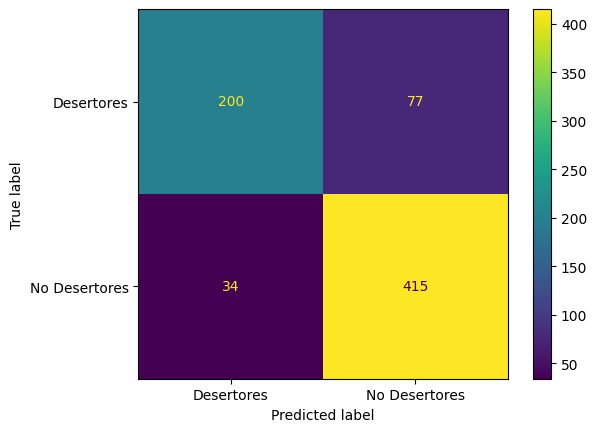

In [ ]:
perform(y_pred_nb)

The Gaussian Naive Bayes model achieved an overall accuracy of 85%. According to the classification report, it correctly identified 92% of graduates (class 1) and 72% of students who dropped out (class 0). The F1 metric, which combines precision and recall, was 0.78 for dropouts and 0.88 for graduates, showing a good balance between the two.

The confusion matrix shows that the model correctly predicted:
* "200 students who dropped out as such"
* "415 students correctly graduated"

However, it misclassified:
* "77 dropouts as graduates"
* "34 graduates as dropouts"

Overall, the model shows good overall performance, with better performance in detecting graduates than dropouts.

## **Logistic Regression**

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred_lr = model_lr.predict(x_test)

Precision:  0.9104683195592287
Recall:  0.9104683195592287
Accuracy:  0.9104683195592287
F1 Score:  0.9104683195592287

 [[233  44]
 [ 21 428]]


******************************************************
                Reporte de Clasificación
******************************************************
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       277
           1       0.91      0.95      0.93       449

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726

******************************************************



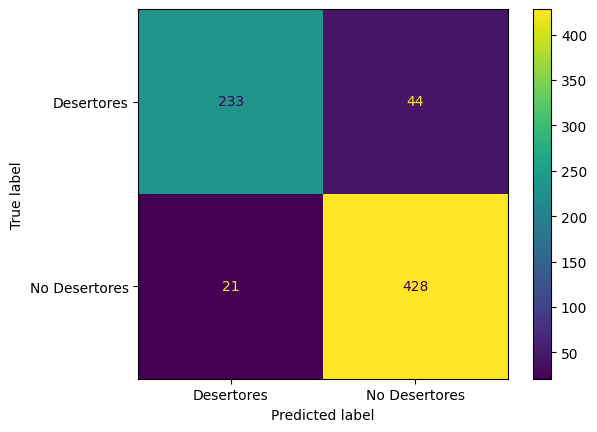

In [ ]:
perform(y_pred_lr)

In this evaluation, the model achieved an overall accuracy of 91%, with excellent performance in both classes. For students who dropped out (class 0), the model achieved an accuracy of 92% and a recall of 84%. For graduates (class 1), the accuracy was 91% and the recall was 95%, indicating that the model is highly effective at identifying graduates.

The confusion matrix shows that:
* "233 dropouts were correctly classified"
* "428 graduates were correctly identified"

There were only:
* "44 dropouts misclassified as graduates"
* "21 graduates misclassified as dropouts"

Overall, the model proves to be very reliable, striking a balance between accuracy and sensitivity, particularly highlighting its ability to correctly identify students who will graduate. However, the recall of students who drop out could be improved, meaning that the model misses some students at risk of dropping out.

## **Decision Tree Classifier**

In [ ]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dt = model_dt.predict(x_test)

Precision:  0.8567493112947658
Recall:  0.8567493112947658
Accuracy:  0.8567493112947658
F1 Score:  0.8567493112947658

 [[223  54]
 [ 50 399]]


******************************************************
                Reporte de Clasificación
******************************************************
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       277
           1       0.88      0.89      0.88       449

    accuracy                           0.86       726
   macro avg       0.85      0.85      0.85       726
weighted avg       0.86      0.86      0.86       726

******************************************************



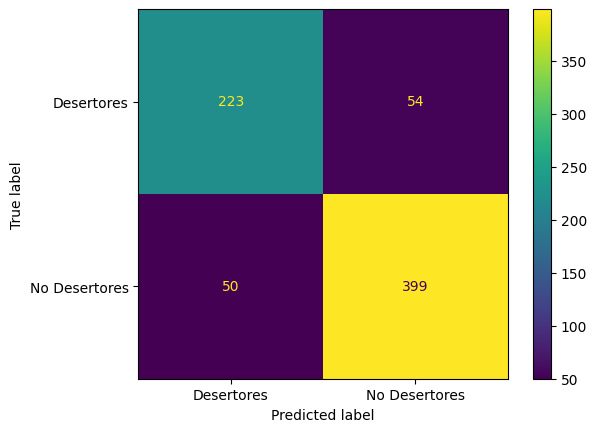

In [ ]:
perform(y_pred_dt)

The model achieved an overall accuracy of 86%, showing acceptable performance but with a higher margin of error compared to other models evaluated. For students who dropped out (class 0), it achieved an accuracy of 82% and a recall of 81%, indicating that most dropout cases were correctly identified. For graduates (class 1), the accuracy was 88% and the recall was 89%, demonstrating a better ability to identify those who completed their studies.

The confusion matrix shows that:
* "233 dropouts were correctly classified, while 54 were misclassified as graduates"
* "399 graduates were correctly identified, but 50 were misclassified as dropouts"

The decision tree model is more flexible and captures nonlinear relationships, but it does not outperform logistic regression in this case. It has lower accuracy and lower recall for predicting dropouts.

## **Random Forest Classifier**

In [ ]:
model_rf = RandomForestClassifier(n_estimators=500, criterion='entropy')
model_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [ ]:
y_pred_rf = model_rf.predict(x_test)

Precision:  0.9022038567493113
Recall:  0.9022038567493113
Accuracy:  0.9022038567493113
F1 Score:  0.9022038567493113

 [[226  51]
 [ 20 429]]


******************************************************
                Reporte de Clasificación
******************************************************
              precision    recall  f1-score   support

           0       0.92      0.82      0.86       277
           1       0.89      0.96      0.92       449

    accuracy                           0.90       726
   macro avg       0.91      0.89      0.89       726
weighted avg       0.90      0.90      0.90       726

******************************************************



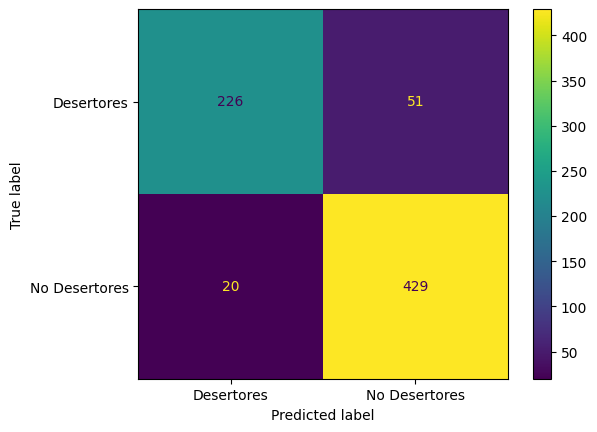

In [ ]:
perform(y_pred_rf)

The model achieved an overall accuracy of 90%, showing balanced performance between both classes. For students who dropped out (class 0), it achieved an accuracy of 93% and a recall of 81%, indicating that most dropouts were correctly identified, although there were some cases misclassified as non-dropouts. On the other hand, for graduates (class 1), the model achieved a recall of 96%, meaning that almost all students who completed their studies were correctly detected.

The confusion matrix reveals that:
* "226 dropouts were correctly identified"
* "429 graduates were correctly classified"
* "There were 51 dropouts misclassified as graduates"
* "And only 20 graduates were misclassified as dropouts"

In short, the model has robust performance, specifically effective in accurately predicting students who will graduate, with a small margin of error in identifying those who drop out. It does not surpass the simplicity and interpretability of logistic regression.

## **XGBClassifier**

In [ ]:
model_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:33:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_xgb = model_xgb.predict(x_test)

Precision:  0.8980716253443526
Recall:  0.8980716253443526
Accuracy:  0.8980716253443526
F1 Score:  0.8980716253443526

 [[230  47]
 [ 27 422]]


******************************************************
                Reporte de Clasificación
******************************************************
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       277
           1       0.90      0.94      0.92       449

    accuracy                           0.90       726
   macro avg       0.90      0.89      0.89       726
weighted avg       0.90      0.90      0.90       726

******************************************************



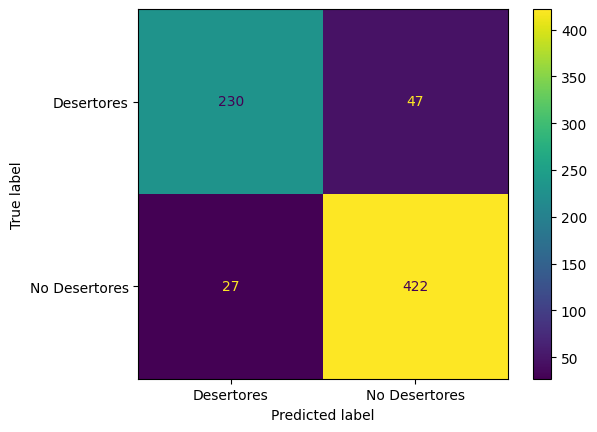

In [ ]:
perform(y_pred_xgb)

The model achieved an overall accuracy of 90%, demonstrating balanced and robust performance. For class 0 (dropouts), an accuracy of 89% and a recall of 83% were achieved, indicating a good ability to identify students who drop out, albeit with some margin of error. For class 1 (graduates), the accuracy was 90% and the recall was 94%, highlighting high effectiveness in correctly recognizing students who complete their studies.

The confusion matrix shows the following:
* "230 dropouts were correctly classified, while 47 were mistaken for graduates."
* "422 graduates were correctly classified, while 27 were misclassified as dropouts."

Overall, the model maintains a very good balance between both classes, being particularly strong in predicting students who graduate, without neglecting the identification of dropouts.

## **Support Vector Classifier (SVM)**

In [ ]:
model_svc = SVC(C = 0.1, kernel = 'linear')
model_svc.fit(x_train, y_train)

SVC(C=0.1, kernel='linear')

In [ ]:
y_pred_svc = model_svc.predict(x_test)

Precision:  0.9008264462809917
Recall:  0.9008264462809917
Accuracy:  0.9008264462809917
F1 Score:  0.9008264462809917

 [[221  56]
 [ 16 433]]


******************************************************
                Reporte de Clasificación
******************************************************
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       277
           1       0.89      0.96      0.92       449

    accuracy                           0.90       726
   macro avg       0.91      0.88      0.89       726
weighted avg       0.90      0.90      0.90       726

******************************************************



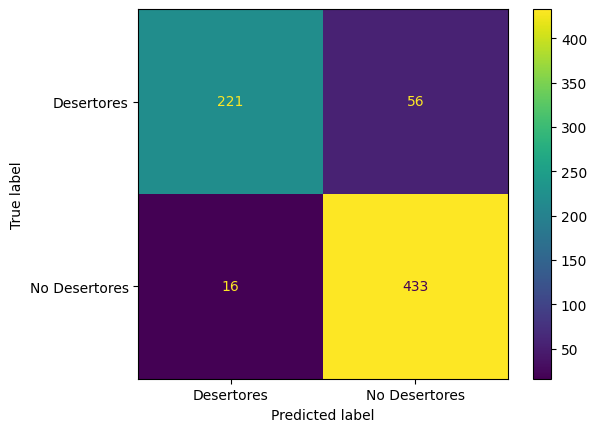

In [ ]:
perform(y_pred_svc)

The model achieved an overall accuracy of 90%, showing solid and balanced performance between both classes. For students who dropped out (class 0), it achieved an accuracy of 93% and a recall of 80%, indicating that most dropouts were correctly identified, although some were mistaken for graduates. For graduates (class 1), the model achieved an outstanding recall of 96% and an accuracy of 89%, demonstrating its high ability to identify those who complete their studies.

The confusion matrix shows that:
* "221 dropouts were correctly classified"
* "433 graduates were accurately identified"
* "There were 56 dropouts misclassified as graduates"
* "And 16 graduates misclassified as dropouts"

In summary, the model shows very stable performance, especially effective in correctly identifying students who graduate, although with a slight margin of error in the classification of those who drop out.

## **Comparison**

NaiveBayes: 0.8471
Logistic Regression: 0.9105
Decision Tree: 0.8567
RandomForest: 0.9022
XGBoost: 0.8981
Support Vector Classifier: 0.9008


Text(0.5, 1.0, 'Comparación de Precisión de Clasificadores')

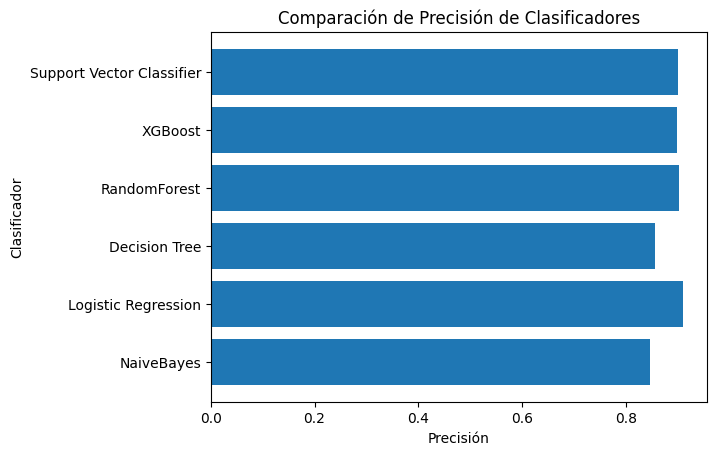

In [ ]:
pred = [y_pred_nb, y_pred_lr, y_pred_dt, y_pred_rf, y_pred_xgb, y_pred_svc]
acc = []
classifiers = ["NaiveBayes", "Logistic Regression", "Decision Tree", "RandomForest", "XGBoost", "Support Vector Classifier"]
for index, i in enumerate(pred):
  temp = accuracy_score(y_test, i)
  acc.append(temp)
  print(f"{classifiers[index]}: {temp:.4f}")

plt.barh(classifiers, acc)

# Agregar etiquetas y título
plt.ylabel('Clasificador')
plt.xlabel('Precisión')
plt.title('Comparación de Precisión de Clasificadores')

The best performing model was **Logistic Regression** with an accuracy of 0.9105, followed closely by Random Forest (0.9022) and Support Vector Classifier (0.9016). XGBoost also performed competitively with 0.8981. On the other hand, Naive Bayes had the lowest accuracy (0.8471), although still reasonable. Overall, tree-based and regression models showed greater effectiveness in the classification task.

The Logistic Regression model performs well and offers slightly better precision and balance between accuracy and recall compared to other models such as Random Forest and SVM.

## **Model Evaluation**

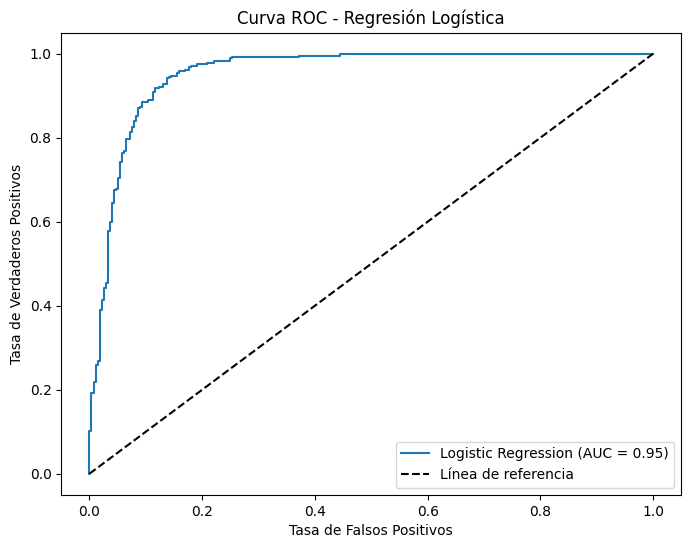

AUC-ROC: 0.95


In [ ]:
# Calcular AUC-ROC para el modelo de regresión logística
y_pred_proba = model_lr.predict_proba(x_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Trazado de la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc_roc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Línea de referencia")
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title("Curva ROC - Regresión Logística")
plt.legend(loc="lower right")
plt.show()

# Mostrar AUC-ROC y centrarse en minimizar los falsos negativos
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC: {auc_roc:.2f}")

The plot shows the ROC curve of the Logistic Regression model, illustrating the trade-off between the true positive (recall) rate and the false positive rate. The horizontal axis represents the false positive rate (FPR), and the vertical axis represents the true positive rate (TPR). The area under the curve (AUC) is 0.95, indicating excellent model performance: the closer it is to 1.0, the better the classifier's ability to distinguish between classes.

The dotted diagonal line represents a model that predicts at random. As can be seen, the model's curve is well above this line, confirming that logistic regression has a high ability to correctly differentiate between students who drop out and those who do not.

## **Interpretability**

Interpretation techniques are then used to explain what features drive the predictions.

[ 0.15038108 -0.13581467 -0.03400613 -0.4356571  -0.16182102  0.19691415
 -0.09009157 -0.45577748 -0.09340824  0.11824996  0.20862652 -0.04840372
  0.05424999 -0.12132147 -0.02417372 -0.30312939  0.92554223 -0.17739054
  0.4020924  -0.25652043  0.53544516 -0.55419104 -0.54553795  0.09282118
  1.86427542 -0.17494162  0.08802136 -0.29004483 -1.42094063 -0.24889906
  2.88684349  0.42475077  0.29072215 -0.11385356  0.01516877 -0.05528002
  0.14256312]


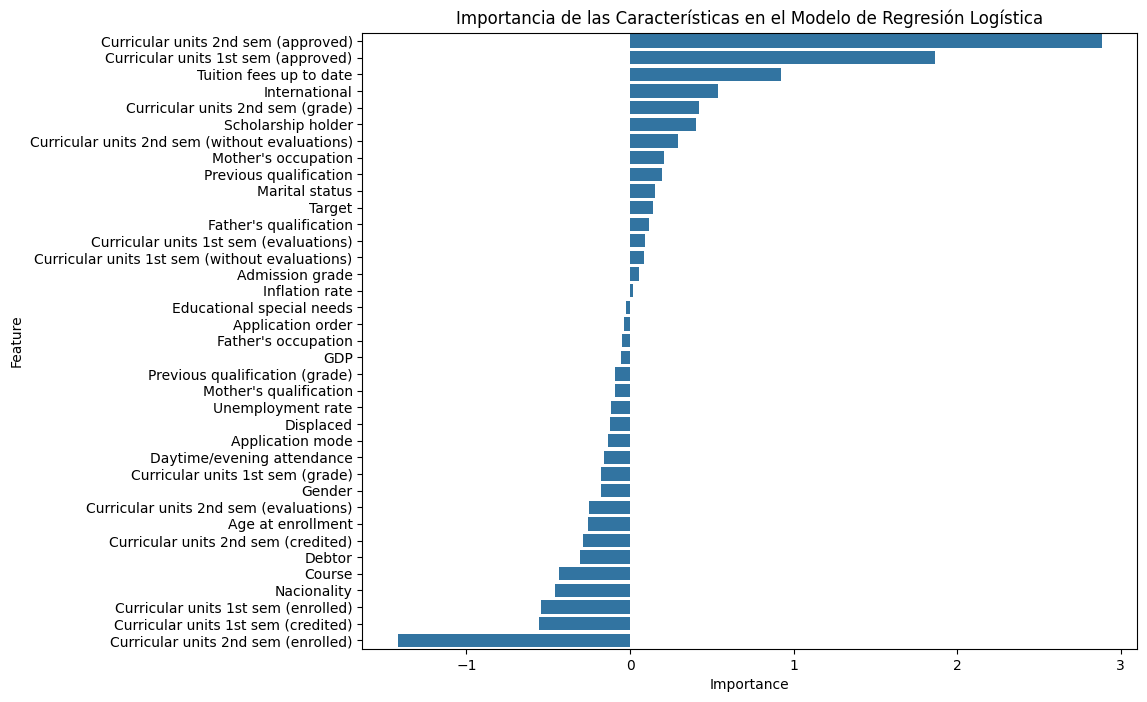

,Feature,Importance
30,Curricular units 2nd sem (approved),2.886843
24,Curricular units 1st sem (approved),1.864275
16,Tuition fees up to date,0.925542
20,International,0.535445
31,Curricular units 2nd sem (grade),0.424751
18,Scholarship holder,0.402092


In [ ]:
# Obtener la importancia de las características del modelo LogisticRegression
feature_importances = model_lr.coef_[0]
print(feature_importances)
features = columns

# Crear un DataFrame para visualizar la importancia de las características
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Graficar la importancia de las características
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importancia de las Características en el Modelo de Regresión Logística')
plt.show()

# Mostrar las características más importantes
importance_df[:6]

Based on feature importance, these are the six most important characteristics that drive the Logistic Regression model's predictions:
* **2nd Semester Curricular Units (Passed) (Importance: 2.88)**: The number of courses a student passes in the second semester is the most important characteristic.
* **1st Semester Curricular Units (Passed) (Importance: 1.86)**: The number of courses a student passes in the first semester is the second most important characteristic.
* **Up-to-Date Tuition (Importance: 0.92)**: This suggests that students who keep their tuition payments current are less likely to drop out of school, which could indicate financial stability.
* **International Student (Importance: 0.53)**: Being an international student positively influences the model's prediction. This could reflect greater academic commitment or extra effort on the part of those studying away from their home country.
* **Second-semester grade point average (Importance: 0.42)**: Higher academic performance in the second semester is associated with a lower likelihood of dropping out, reinforcing the importance of consistent performance throughout the program.
* **Scholarship (Importance: 0.40)**: Whether a student participates in a scholarship program or not can influence retention, as financial support could reduce the risk of dropping out.

## **Conclusion**

Predicting student dropout is a crucial task that can help institutions take proactive steps to improve retention rates. By using machine learning models such as Logistic Regression, Random Forest, and XGBoost, among others, we were able to identify key factors influencing dropout rates, such as academic performance and financial factors.

Logistic Regression performed best with a high AUC-ROC score, and feature importance analysis provided actionable insights for educational institutions to target their interventions.

By leveraging data analytics, we can make data-driven decisions to support students, improve graduation rates, and ensure a more equitable academic experience.